<a href="https://colab.research.google.com/github/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/blob/main/Apply_Different_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

In [10]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv"
df = pd.read_csv(url)

df.head()


,AIDS/HIV,Alcohol abuse,Blood loss anaemia,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Congestive heart failure,Deficiency anaemia,Depression,Diabetes (complicated),...,Obesity,Other neurological disorders,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Psychoses,Pulmonary circulation,Renal failure,Rheumatoid arthritis,Outcome
0,1,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,66,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,1
2,1,89,0,0,0,1,0,0,52,0,...,0,0,0,0,0,0,0,0,0,1
3,1,69,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
4,0,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Drop the 'Outcome' column
features = df.drop(columns=['Outcome'])


In [12]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(features)


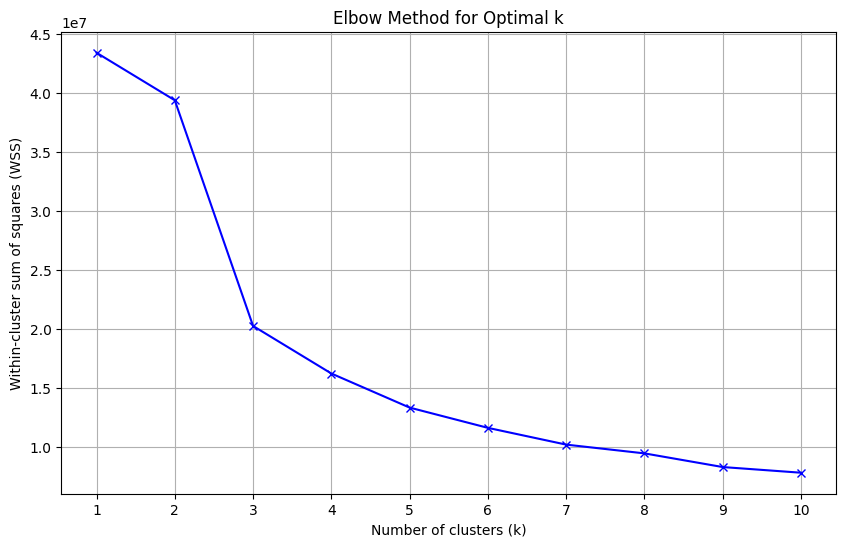

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to hold the WSS values
wss = []
k_values = range(1, 11)  # You can adjust the range as needed

# Calculate WSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()


In [28]:
# Assuming you found the optimal k (e.g., k = 3)
optimal_k = 2 # Replace with the actual optimal value you found

# Fit the k-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [29]:
df

,AIDS/HIV,Alcohol abuse,Blood loss anaemia,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Congestive heart failure,Deficiency anaemia,Depression,Diabetes (complicated),...,Other neurological disorders,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Psychoses,Pulmonary circulation,Renal failure,Rheumatoid arthritis,Outcome,Cluster
0,1,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,66,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0
2,1,89,0,0,0,1,0,0,52,0,...,0,0,0,0,0,0,0,0,1,0
3,1,69,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
4,0,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,1,80,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,1,66,0,0,10,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6633,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
6634,0,61,0,0,0,0,0,0,0,0,...,0,4,0,0,0,5,0,0,0,0


In [30]:
#value count cluster

df['Cluster'].value_counts()

,count
Cluster,
0,6627
1,9


In [24]:
df.to_csv('clustered_data.csv', index=False)
from google.colab import files
files.download('clustered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Hierarchical Clustering

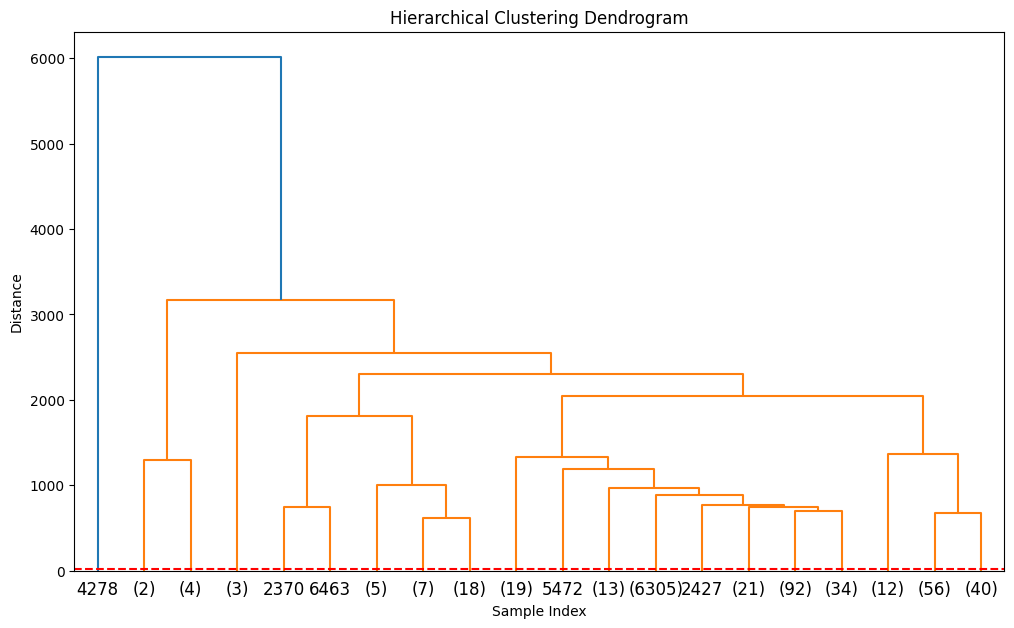

Observe the dendrogram and choose an appropriate distance cutoff.
Then run the next code block with your chosen number of clusters.
Enter number of clusters: 3


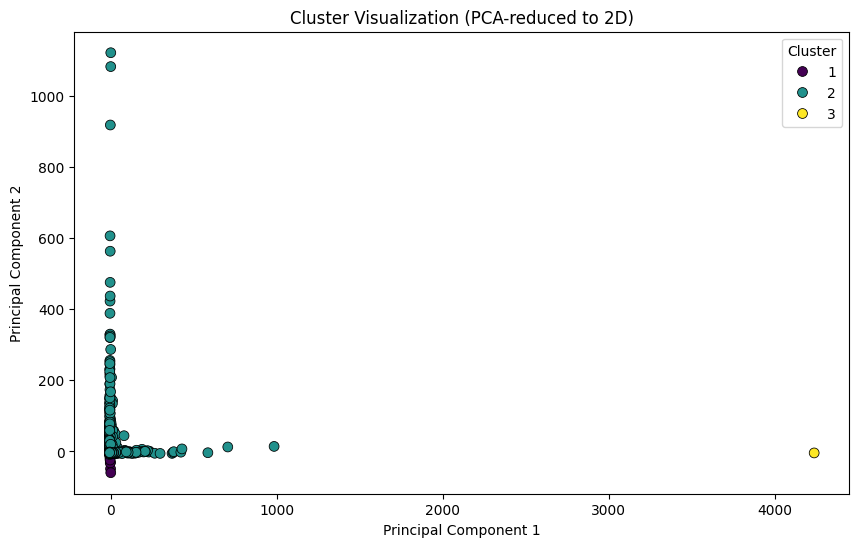


Cluster Distribution:
Cluster
1       6
2    6629
3       1
Name: count, dtype: int64

Cluster Profiles:
         AIDS/HIV  Alcohol abuse  Blood loss anaemia  Cardiac arrhythmias  \
Cluster                                                                     
1            0.67          62.17                3.17                 0.00   
2            0.50          68.77                3.29                 0.36   
3            1.00          84.00                6.00                 0.00   

         Chronic pulmonary disease  Coagulopathy  Congestive heart failure  \
Cluster                                                                      
1                             0.00          0.00                      0.00   
2                             0.37          1.52                      1.90   
3                           424.00       1202.00                   2474.00   

         Deficiency anaemia  Depression  Diabetes (complicated)  ...  Obesity  \
Cluster                             

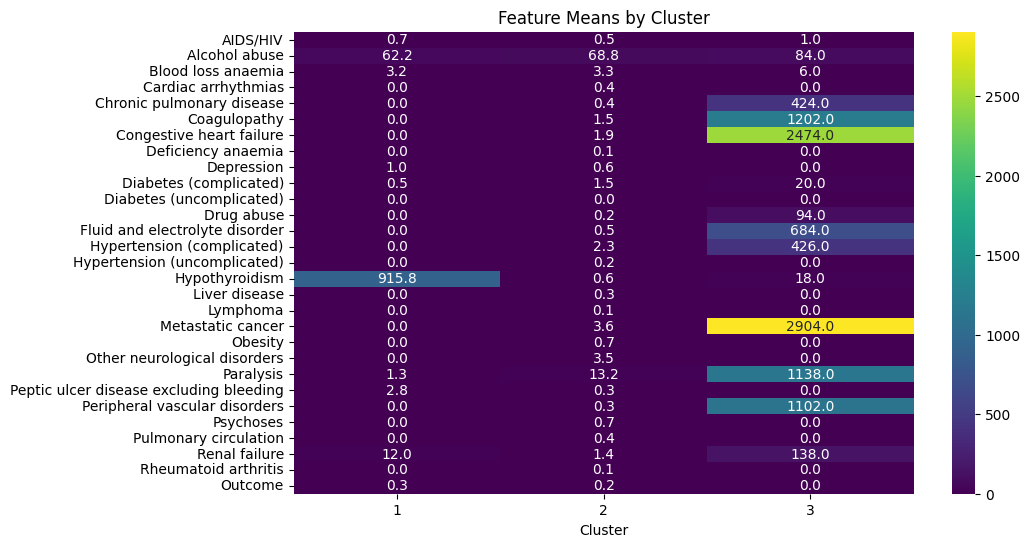

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns

# Load your dataset (using placeholders - replace with your actual data)
url = "https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv"
data = pd.read_csv(url)

# Preprocessing
if 'Outcome' in data.columns:
    features = data.drop(columns=['Outcome'])
else:
    features = data.copy()

# 3. Feature scaling
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# Perform the clustering
Z = linkage(scaled_features, method='ward', metric='euclidean')

# 1. Visualize with a dendrogram
plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.axhline(y=15, color='r', linestyle='--')  # Example cutoff line
plt.show()

# Determine optimal clusters (interactive method)
print("Observe the dendrogram and choose an appropriate distance cutoff.")
print("Then run the next code block with your chosen number of clusters.")

# Assign clusters based on chosen cutoff/number of clusters
k = int(input("Enter number of clusters: ") or "3")
clusters = fcluster(Z, t=k, criterion='maxclust')

# Add cluster labels back to original data
if isinstance(data, pd.DataFrame):
    data['Cluster'] = clusters
else:
    data = pd.DataFrame(data)
    data['Cluster'] = clusters

# Visualize clusters (using first 2 PCA components for 2D visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0],
                y=principal_components[:, 1],
                hue=data['Cluster'],
                palette='viridis',
                s=50,
                edgecolor='k')
plt.title('Cluster Visualization (PCA-reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Cluster Analysis
print("\nCluster Distribution:")
print(data['Cluster'].value_counts().sort_index())


# Alternative visualization (heatmap of feature means)
cluster_means = data.groupby('Cluster').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt='.1f')
plt.title('Feature Means by Cluster')
plt.show()


In [2]:
data

,AIDS/HIV,Alcohol abuse,Blood loss anaemia,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Congestive heart failure,Deficiency anaemia,Depression,Diabetes (complicated),...,Other neurological disorders,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Psychoses,Pulmonary circulation,Renal failure,Rheumatoid arthritis,Outcome,Cluster
0,1,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,66,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,2
2,1,89,0,0,0,1,0,0,52,0,...,0,0,0,0,0,0,0,0,1,2
3,1,69,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,2
4,0,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,1,80,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6632,1,66,0,0,10,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6633,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,2
6634,0,61,0,0,0,0,0,0,0,0,...,0,4,0,0,0,5,0,0,0,2


In [3]:
#value count cluster

data['Cluster'].value_counts()

,count
Cluster,
2,6629
1,6
3,1


# DBSCAN Clustering

Cluster label distribution (−1 = noise): Counter({np.int64(-1): 4212, np.int64(0): 1100, np.int64(1): 970, np.int64(12): 30, np.int64(11): 30, np.int64(6): 22, np.int64(17): 21, np.int64(7): 17, np.int64(4): 16, np.int64(8): 16, np.int64(20): 16, np.int64(13): 16, np.int64(2): 15, np.int64(16): 15, np.int64(18): 12, np.int64(25): 11, np.int64(14): 11, np.int64(21): 11, np.int64(15): 11, np.int64(24): 10, np.int64(5): 10, np.int64(9): 10, np.int64(10): 10, np.int64(19): 10, np.int64(26): 10, np.int64(22): 10, np.int64(3): 7, np.int64(23): 7})
Silhouette Score: -0.427


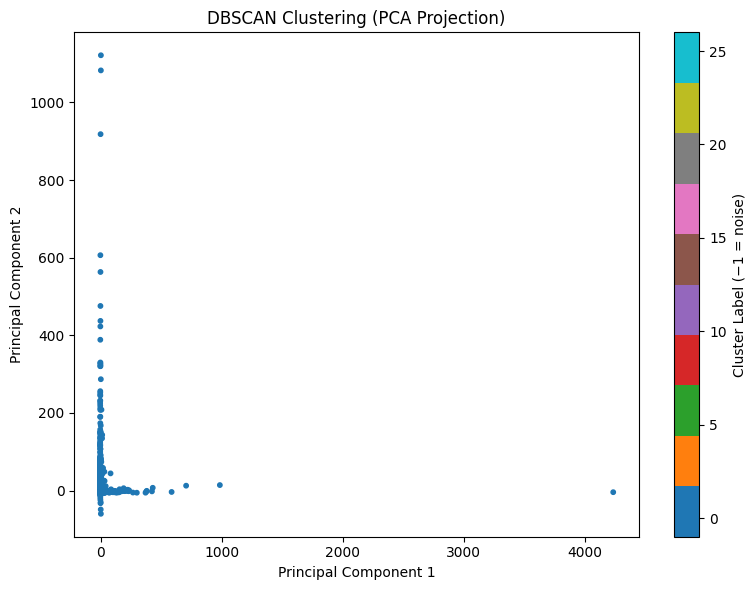

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import Counter

# 1. Load dataset from URL
url = "https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv"
df3 = pd.read_csv(url)

# 2. Separate features and labels
X = df3.drop("Outcome", axis=1).values

# 3. Scale features with RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 4. Run DBSCAN clustering
db = DBSCAN(eps=0.6, min_samples=10, n_jobs=-1)
labels = db.fit_predict(X_scaled)

# 5. Show cluster label distribution
label_counts = Counter(labels)
print("Cluster label distribution (−1 = noise):", label_counts)

# 6. Silhouette score
core_clusters = [l for l in set(labels) if l != -1]
if len(core_clusters) > 1:
    sil = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {sil:.3f}")
else:
    print("Not enough clusters for silhouette score.")

# 7. PCA Visualization of clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=10)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster Label (−1 = noise)")
plt.tight_layout()
plt.show()


In [32]:
# Add DBSCAN labels to the original DataFrame
df3['DBSCAN_Cluster'] = labels


In [33]:
df3.head()

,AIDS/HIV,Alcohol abuse,Blood loss anaemia,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Congestive heart failure,Deficiency anaemia,Depression,Diabetes (complicated),...,Other neurological disorders,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Psychoses,Pulmonary circulation,Renal failure,Rheumatoid arthritis,Outcome,DBSCAN_Cluster
0,1,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,66,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,1
2,1,89,0,0,0,1,0,0,52,0,...,0,0,0,0,0,0,0,0,1,-1
3,1,69,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
4,0,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [34]:
df3['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
-1,4212
0,1100
1,970
12,30
11,30
6,22
17,21
7,17
8,16


In [35]:
df3.to_csv('df3_with_clusters.csv', index=False)
files.download('df3_with_clusters.csv')
print("df3 with DBSCAN clusters downloaded as 'df3_with_clusters.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

df3 with DBSCAN clusters downloaded as 'df3_with_clusters.csv'
